<a href="https://colab.research.google.com/github/thisissamuca/Processamento_de_imagens/blob/main/Aula_PI_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Imagens 01**



Instalando bibliotecas necessárias

Documentação do Pillow
https://pillow.readthedocs.io/en/stable/reference/Image.html

In [ ]:
pip install Pillow

### **Principais códigos do Pillow:**

**`Image.putpixel(xy, value)`**

Modifica o pixel na posição especificada. A cor é dada como um valor numérico único para imagens de banda única e uma tupla para imagens de várias bandas. Além disso, tuplas RGB e RGBA são aceitas para imagens P.

**`Image.new(mode, size, color=0)`**

Cria uma nova imagem com o modo e tamanho fornecidos.

**mode** – O modo a ser usado para a nova imagem.

**size** – Uma tupla de 2, contendo (largura, altura) em pixels.

**color** – Qual cor usar para a imagem.

**`Image.save(fp, format=None)`**

Salva esta imagem com o nome de arquivo fornecido. Se nenhum formato for especificado, o formato a ser usado será determinado pela extensão do nome do arquivo, se possível.

**`Image.size`**

Tamanho da imagem, em pixels. O tamanho é dado como uma tupla de 2 (largura, altura).

**`Image.open(fp, mode='r', formats=None)`**

Abre e identifica o arquivo de imagem fornecido.

**`Image.getpixel(xy)`**

Retorna o valor do pixel em uma determinada posição.

## **Criando uma imagem do zero**

Criaremos uma imagem pensando em uma matriz composta por um número finito de pixels catalogados com a numeração de cor RGB. Para isso, precisamos primeiro preparar o ambiente:

In [53]:
# Importando bibliotecas

from PIL import Image
import os

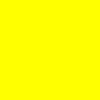

In [133]:
# Código fundamental para criar uma imagem retangular

image = Image.new("RGB",(100, 100), (255, 255, 0)) # Modo, Size, Cor
image

Agora, faremos operações matemáticas para criar figuras dentro desse retangulo:

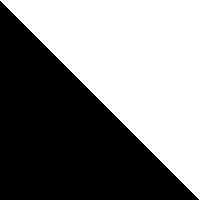

In [135]:
# Definindo função para gerar um triângulo

def triangle(size): # Colocando o tamanho como parâmetro

# Definindo a cores

  WHITE = (255, 255, 255) 
  BLACK = (0, 0, 0)

# Criando um quadrado branco

  image = Image.new("RGB", (size, size), WHITE) 

# Criando um laço para percorrer com alguma ação em x, y unidades de comprimento 

  for x in range (size):
    for y in range (size):

# Utilzando todos os valores de x < y

      if x < y: 
        image.putpixel((x, y), BLACK)

  return image

if __name__ == "__main__":
  t = triangle(200)
  t.show()

t

Faremos agora, a bandeira da França. A proporção da bandeira é dada por 3/2, ou seja, é um retângulo. Cada faixa vertical iremos dividir em 1/3 na largura total da imagem:

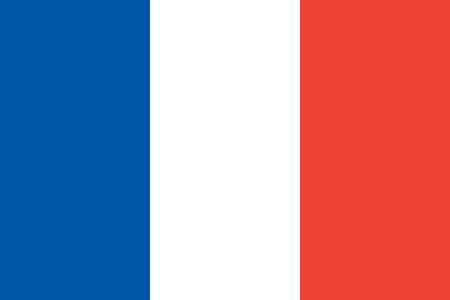

In [137]:
# Definindo função para gerar a bandeira da França

def bandeira_franca (height):

# Definindo a cores

  WHITE = (255, 255, 255)
  RED = (239, 65, 53)
  BLUE = (0, 85, 164)

# Definindo a largura e a divisão

  width = 3*height//2
  offset = width//3

# Criando um quadrado branco

  image = Image.new("RGB", (width, height), WHITE) # Criando um quadrado branco

# Criando um laço para percorrer com alguma ação em x, y unidades de comprimento 

  for x in range (offset):
    for y in range (height):

# Atribuindo cores para as divisões utilizando o parâmetro de x

      image.putpixel((x, y), BLUE)
      image.putpixel((x + 2*offset, y), RED)
  return image

if __name__ == "__main__":
  bandeira = bandeira_franca (300)
  bandeira.show()

bandeira

## **Escala de cinza**

Para converter qualquer cor em seu nível aproximado de cinza, deve-se primeiro obter suas primitivas vermelho, verde e azul (da escala RGB). Adiciona-se então 29.9% do vermelho mais 58.7% do verde mais 11.4% do azul.

Logo, a escala de cinza nada mais é do que uma média ponderada na forma:

RGB (x, y, z) => (0.299*x, 0.587*y, 0.114*z)

Começaremos o estudo usando essa média ponderada:

In [130]:
# Definindo uma função com o parâmetro de cor para converter a imagem em escala de cinza

def grayscale(colored):

# Atribuindo o tamanho da imagem colorida

  w, h = colored.size

# Criando uma nova imagem

  img = Image.new('RGB', (w, h))

# Criando uma laço para percorrer a imagem em x, y unidades de comprimento

  for x in range(w):
    for y in range(h):

# Coletando o RGB de cada pixel na imagem 

      pxl = colored.getpixel((x, y))

# Convertendo cada pixel em grayscale

      lum = int((0.299*pxl[0] + 0.587*pxl[1] + 0.114*pxl[2]))

# Modificando os pixels em x,y utilizando a média ponderada lum em RGB (x, y, z)

      img.putpixel((x, y), (lum, lum, lum))

  return img

# Abrindo a imagem que será convertida

baloes = Image.open('balao.jpg')

# Convertendo a imagem em questão

pb_baloes = grayscale(baloes)

# Salvando e abrindo a imagem convertida no banco de dados

pb_baloes.save("pb_baloes.jpg")
pb_baloes

Agora faremos a mesma coisa, porém, utilizando uma média simples para converter a imagem

In [126]:
# Definindo uma função com o parâmetro de cor para converter a imagem em escala de cinza

def grayscale(colored):

# Atribuindo o tamanho da imagem colorida

  w, h = colored.size

# Criando uma nova imagem

  img = Image.new('RGB', (w, h))

# Criando uma laço para percorrer a imagem em x, y unidades de comprimento

  for x in range(w):
    for y in range(h):

# Coletando o RGB de cada pixel na imagem 

      pxl = colored.getpixel((x, y))

# Convertendo cada pixel em grayscale

      lum = (pxl[0] + pxl[1] + pxl[2])//3

# Modificando os pixels em x,y utilizando a média ponderada lum em RGB (x, y, z)

      img.putpixel((x, y), (lum, lum, lum))

  return img

# Abrindo a imagem que será convertida

baloes2 = Image.open('balao.jpg')

# Convertendo a imagem em questão

pb_baloes2 = grayscale(baloes)

# Salvando e abrindo a imagem convertida no banco de dados

pb_baloes2.save("pb_baloes2.jpg")
pb_baloes2